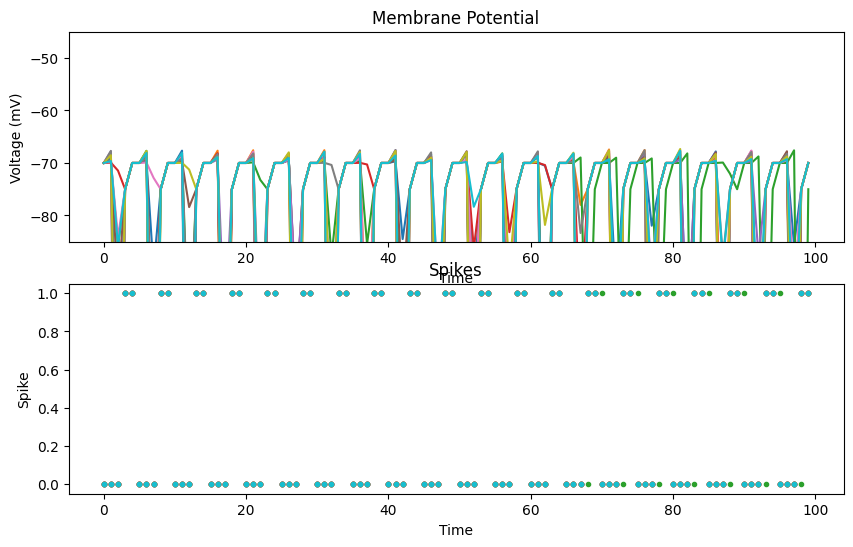

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_neurons = 10
num_layers = 3
num_timesteps = 100
dt = 0.001

# Neuron model
V_rest = -70
V_threshold = -55
V_reset = -75
tau_m = 0.02
tau_ref = 0.002

# Synaptic connections
W_ff = np.random.rand(num_neurons, num_neurons) * 0.1
W_fb = np.random.rand(num_neurons, num_neurons) * 0.1

# Spike-Timing Dependent Plasticity (STDP) learning rule
tau_stdp = 0.02
A_plus = 0.01
A_minus = -0.01

# Input data
X = np.random.rand(num_neurons, num_timesteps)

# Initialize variables
V = np.zeros((num_neurons, num_timesteps))
V[:, 0] = V_rest
spikes = np.zeros((num_neurons, num_timesteps))

# Simulation loop
for t in range(1, num_timesteps):
    # Calculate feedforward current
    I_ff = np.dot(W_ff, spikes[:, t-1])

    # Calculate feedbackward current
    I_fb = np.dot(W_fb, spikes[:, t-1])

    # Calculate total input current
    I_in = X[:, t] + I_ff + I_fb

    # Update membrane potential
    V[:, t] = V[:, t-1] + (-V[:, t-1] + V_rest + I_in * dt / tau_m) / tau_m

    # Generate spikes
    spike_indices = np.where(V[:, t] > V_threshold)[0]
    spikes[spike_indices, t] = 1
    V[spike_indices, t] = V_reset

    # Refractory period
    refractory_indices = np.where(spikes[:, t-1] == 1)[0]
    V[refractory_indices, t] = V_rest

    # STDP learning rule
    for i in range(num_neurons):
        for j in range(num_neurons):
            if spikes[i, t-1] == 1 and spikes[j, t] == 1:
                delta_w = A_plus * np.exp(-(t - 1 - tau_stdp) / tau_stdp)
                W_ff[i, j] += delta_w
            elif spikes[i, t-1] == 0 and spikes[j, t] == 1:
                delta_w = A_minus * np.exp(-(t - 1 - tau_stdp) / tau_stdp)
                W_fb[j, i] += delta_w

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("Membrane Potential")
plt.plot(V.T)
plt.xlabel("Time")
plt.ylabel("Voltage (mV)")
plt.ylim(V_reset - 10, V_threshold + 10)
plt.subplot(2, 1, 2)
plt.title("Spikes")
plt.plot(spikes.T, ".")
plt.xlabel("Time")
plt.ylabel("Spike")
plt.show()